In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Finger 1
Extraemos cierta información sobre el conjuto de datos

In [2]:
pd.set_option('display.max_columns', 25)

In [3]:
tipos_de_dato = {
    'event': 'category',
    'url': 'category',
    'model': 'category',
    'condition': 'category',
    'storage': 'category',
    'color': 'category',
    'staticpage': 'category',
    'search_engine': 'category',
    'channel': 'category',
    'new_vs_returning': 'category',
    'city': 'category',
    'region': 'category',
    'country': 'category',
    'device_type': 'category',
    'operating_system_version': 'category',
    'browser_version': 'category'
}
df = pd.read_csv('../../fiuba-trocafone-tp1-final-set/events.csv', low_memory=False, dtype=tipos_de_dato)

## Clasifico los datos
Espero las siguientes columnas sean categoricas: evento, url, model, condition, storage, color, ...
person: identificador del usuario que visita la pagina. Parece ser un numero en hexadecimal. Podriamos pasarlo a binario o a decimal pero no ganariamos nada, dado que no resulta util calcular promedios, varianzas, etc. sobre un identificador.
sku: Identificador de producto relacionado al evento. Numerico.

In [4]:
df.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,criteo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Timestamp

In [5]:
df['timestamp'].size == df['timestamp'].count()

True

No hay nulos en la columna de timestamp, por lo que la transformamos a fecha.

In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

### Sku
El 'sku' son principalmente enteros, pero dado que varias entradas tienen el valor NaN, se los tratara como floats. Sin embargo al tratar de convertir los datos a float se encontraron valores que aparecen como 'undefined'.

In [7]:
try:
    pd.to_numeric(df['sku'])
except ValueError:
    print('No todos los valores de sku son numericos!')
sku_no_definido = df[df['sku'] == 'undefined']
sku_no_definido

No todos los valores de sku son numericos!


,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
368097,2018-05-22 13:53:14,checkout,602b3649,NaN,undefined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387149,2018-05-22 13:44:53,checkout,655402b0,NaN,undefined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se ve que son solo dos y que todas las columnas son valores nulos exceptuando la de personas, así que sospechamos que son eventos que no sirven realmente. Para confirmarlo podemos buscar otros eventos de dichas personas y ver si hay otro en un timestamp cercano y con datos en mas columnas.

In [8]:
personas = df[df['sku'] == 'undefined']['person']
df[df['person'].isin(personas)]

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
368096,2018-05-22 13:53:02,visited site,602b3649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Direct,New,Unknown,Unknown,Brazil,Computer,1366x768,Windows 7,Chrome 66.0
368097,2018-05-22 13:53:14,checkout,602b3649,NaN,undefined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387149,2018-05-22 13:44:53,checkout,655402b0,NaN,undefined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387150,2018-05-22 13:44:53,visited site,655402b0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Direct,New,Unknown,Unknown,Brazil,Computer,1366x768,Windows 7,Chrome 66.0


Se ve que en ambos casos existe otro evento de tipo 'visited site' a pocos segundos del primer evento, por lo cual podemos descartarlos sabiendo que existe otro con mas información que representa la visita del usuario. 


In [9]:
df.drop(index=sku_no_definido.index, inplace=True)

Ahora podemos transformar el 'sku' a un tipo numerico.

In [10]:
df['sku'] = pd.to_numeric(df['sku'])

## Eventos con mayor frecuencia

In [11]:
eventos_por_orden_de_frecuencia = df['event'].value_counts()
eventos_por_orden_de_frecuencia

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33733
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

Text(0,0.5,'Eventos')

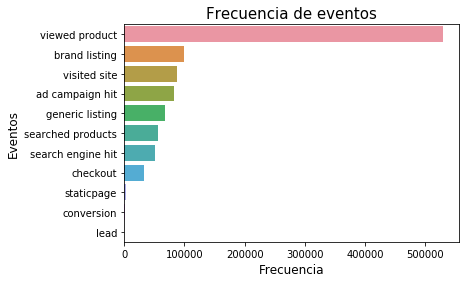

In [16]:
g = sns.barplot(y=list(eventos_por_orden_de_frecuencia.index), x=list(eventos_por_orden_de_frecuencia))
g.set_title("Frecuencia de eventos", fontsize=15)
g.set_xlabel("Frecuencia", fontsize=12)
g.set_ylabel("Eventos", fontsize=12)

## 5 productos con más conversiones
Calculo los 5 productos (identificados por sku) con mayor cantidad de conversiones.

In [19]:
productos = df[df['event'] == 'conversion'].groupby('sku').count().sort_values('timestamp', ascending=False).iloc[0:5]
productos['timestamp']

sku
6371.0    30
6370.0    18
7631.0    17
2692.0    16
3371.0    14
Name: timestamp, dtype: int64

Text(0,0.5,'Cantidad de conversiones')

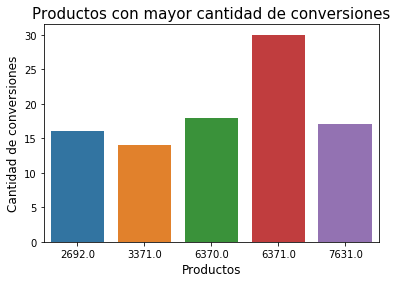

In [27]:
g = sns.barplot(y=list(productos['timestamp']), x=list(productos.index))
g.set_title('Productos con mayor cantidad de conversiones', fontsize=15)
g.set_xlabel('Productos', fontsize=12)
g.set_ylabel('Cantidad de conversiones', fontsize=12)

## 10 usuarios con más actividad
Calculo los 10 usuarios que registraron más actividad en la plataforma (es decir, realizaron más eventos).

In [29]:
usuarios = df.groupby('person').count().sort_values('timestamp', ascending=False).iloc[0:11]

Text(0,0.5,'Cantidad de conversiones')

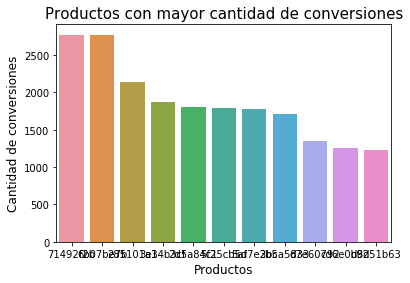

In [30]:
g = sns.barplot(y=list(usuarios['timestamp']), x=list(usuarios.index))
g.set_title('usuarios con más actividad', fontsize=15)
g.set_xlabel('Productos', fontsize=12)
g.set_ylabel('Cantidad de conversiones', fontsize=12)